In [1]:
import numpy as np
import pandas as pd

## 用Numpy和Pandas分析一维数据

### Numpy数组

In [9]:
def max_employment(coutires, employment):
    max_country = None
    max_employment = 0
    
    for i in range(len(countries)):
        country = countries[i]
        country_employment = employment[i]
        
        if country_employment > max_employment:
            max_country = country
            max_employment = country_employment
            
    return (max_country, max_employment)

可以用Numpy数组中的`argmax`简化上边的方法：

In [3]:
def max_employment2(countries, employment):
    i = employment.argmax() # 返回最大值的索引
    return (countries[i], employment[i])

In [4]:
countries = np.array([
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
])

# Employment data in 2007 for those 20 countries
employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

支持切片操作：

In [5]:
print(countries[1:])
print(countries[:17])
print(countries[:])

['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina']
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin']
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina']


使用`dtype`查看数据类型

In [6]:
print(countries.dtype)
print(employment.dtype)
print(np.array([0,1,2]).dtype)

<U22
float64
int32


Numpy中一些描述统计的函数：

In [7]:
employment.std() # 标准差
employment.mean() # 均值
employment.max() # 最大值
employment.sum() # 求和

1173.7000007700001

In [10]:
print(max_employment(countries, employment))
print(max_employment2(countries, employment))

('Angola', 75.699996949999999)
('Angola', 75.699996949999999)


### 向量化运算

计算整体完成率

In [11]:
def overall_completion_rate(female_completion, male_completion):
    return (female_completion + male_completion) / 2

### 归一化数据

In [12]:
def standardize_data(values):
    return (values - values.mean()) / values.std()

### Numpy索引

In [13]:
a = np.array([1, 2, 3, 4, 5])
a[a > 2]

array([3, 4, 5])

In [14]:
time_spent = np.array([
       12.89697233,    0.        ,   64.55043217,    0.        ,
       24.2315615 ,   39.991625  ,    0.        ,    0.        ,
      147.20683783,    0.        ,    0.        ,    0.        ,
       45.18261617,  157.60454283,  133.2434615 ,   52.85000767,
        0.        ,   54.9204785 ,   26.78142417,    0.
])

# Days to cancel for 20 students
days_to_cancel = np.array([
      4,   5,  37,   3,  12,   4,  35,  38,   5,  37,   3,   3,  68,
     38,  98,   2, 249,   2, 127,  35
])

In [15]:
def mean_time_for_paid_students(time_spent, days_to_cancel):
    return time_spent[days_to_cancel >= 7].mean()

mean_time_for_paid_students(time_spent, days_to_cancel)

41.054003485454537

### 原位运算
Numpy中使用`+=`时会改变原数组

In [16]:
a = np.array([1, 2, 3, 4])
b = a
a += np.array([1, 1, 1, 1])
print(b)

[2 3 4 5]


Numpy中使用切片操作`:`时会直接改变原数组（Python中的切片不会）

In [17]:
a = np.array([1, 2, 3, 4, 5])
slice = a[:3]
slice[0] = 100
print(a)

[100   2   3   4   5]


### Pandas Series

In [18]:
def variable_correlation(variable1, variable2):
    both_above = (variable1 > variable1.mean()) & \
                 (variable2 > variable2.mean())
    both_below = (variable1 < variable1.mean()) & \
                 (variable2 < variable2.mean())
    is_same_direction = both_above | both_below
    num_same_direction = is_same_direction.sum()
    
    num_different_direction = len(variable1) - num_same_direction
    
    return (num_same_direction, num_different_direction)

In [19]:
countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

life_expectancy = pd.Series(life_expectancy_values, index=countries)
gdp = pd.Series(gdp_values, index=countries)

In [20]:
variable_correlation(life_expectancy, gdp)

(17, 3)

### 向量化运算和Series索引

In [24]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'c', 'd'])
sum_result = s1 + s2
sum_result

a     NaN
b     NaN
c    33.0
d    44.0
e     NaN
f     NaN
dtype: float64

In [25]:
sum_result.dropna()

c    33.0
d    44.0
dtype: float64

In [26]:
s1.add(s2, fill_value=0)

a     1.0
b     2.0
c    33.0
d    44.0
e    10.0
f    20.0
dtype: float64

### apply()

In [27]:
names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez'
])

In [28]:
def reverse_name(name):
    split_name = name.split(" ")
    first_name = split_name[0]
    last_name = split_name[1]
    return last_name + ", " + first_name

reverse_name(names.iloc[0])

'Agassi, Andre'

In [29]:
def reverse_names(names):
    return names.apply(reverse_name)

reverse_names(names)

0            Agassi, Andre
1             Bonds, Barry
2    Columbus, Christopher
3            Defoe, Daniel
4          Estevez, Emilio
dtype: object

## 用Numpy和Pandas分析二维数据
### 二维Numpy数组

In [32]:
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [33]:
def mean_riders_for_max_station(ridership):
    # Find the station with the maximum riders on the first day
    max_station = ridership[0, :].argmax()
    
    # Find the mean riders per day for that station
    mean_for_max = ridership[:, max_station].mean()
    
    # Find the mean ridership overall for comparsion
    overall_mean = ridership.mean()
    
    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

### Numpy轴 axis
`axis = 0`按列方向计算，`axis = 1`按行方向计算。

In [34]:
def mean_and_max_riders_per_day(ridership):
    # Find the mean ridership peer day for each subway station
    station_riders = ridership.mean(axis=0)
    
    # Find the maximum daily ridership and the minimum
    max_daily_ridership = station_riders.max()
    min_daily_ridership = station_riders.min()
    
    return (max_daily_ridership, min_daily_ridership)

mean_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

### 访问DataFrame元素

In [35]:
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

ridership_df.head(3)

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691


In [38]:
ridership_df.loc['05-02-11']
ridership_df.iloc[9]
ridership_df.iloc[0, 3] # 第0行3列
ridership_df.loc['05-02-11', 'R005']
ridership_df['R006'] # 获取列

ridership_df.ilocp[0].argmax()

5

In [39]:
ridership_df.values
ridership_df.values.mean()

2342.5999999999999

In [40]:
def mean_riders_for_max_station2(ridership):
    # Find the station with the maximum riders on the first day
    max_station = ridership.iloc[0].argmax()
    
    # Find the mean riders per day for that station
    mean_for_max = ridership[max_station].mean()
    
    # Find the mean ridership overall for comparsion
    overall_mean = ridership.values.mean()
    
    return (overall_mean, mean_for_max)

mean_riders_for_max_station2(ridership_df)

(2342.5999999999999, 3239.9000000000001)

### 将数据添加到DataFrame中

In [41]:
subway_df = pd.read_csv('nyc-subway-weather.csv')

subway_df.head(3)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [43]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


### 计算皮尔逊积矩相关系数（Pearson's r）
Pandas中的`std()`计算的是样本标准偏差（使用了贝塞尔校正系数）,我们计算相关性时需调用`std(ddof=0)`

In [44]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    # 用向量化乘法计算系数
    return (std_x * std_y).mean()

In [45]:
correlation(subway_df['ENTRIESn_hourly'], subway_df['meanprecipi'])

0.035648515772244052

上面计算你的是每小时入站人数和降水量的相关性，结果是0.03，可知这俩变量基本没有什么相关性。

In [47]:
correlation(subway_df['ENTRIESn_hourly'], subway_df['ENTRIESn'])

0.58589547076620752

In [48]:
# Numpy中的`corrcoef()`可计算相关系数
np.corrcoef(subway_df['ENTRIESn_hourly'], subway_df['meanprecipi'])

array([[ 1.        ,  0.03564852],
       [ 0.03564852,  1.        ]])

### DataFrame轴名

使用`axis = 'index'`同`axis = 0`;
使用`axis = columns`同`axis = 1`

### DataFrame向量化运算

In [49]:
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

In [50]:
# 使用shift()位移函数实现
def get_hourly_entries_and_exits(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


### DataFrame applymap()

In [51]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [54]:
def convert_grade(grade):
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    else:
        return 'F'
    
convert_grade(80)

'B'

In [55]:
def convert_grades(grades):
    return grades.applymap(convert_grade)

convert_grades(grades_df).head()

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D


### DataFrame apply()

In [57]:
def standardize_column(column):
    return (column - column.mean()) / column.std()

standardize_column(grades_df['exam1'])

Andre     -2.196525
Barry      0.208891
Chris      0.018990
Dan       -0.170911
Emilio     0.715295
Fred      -0.487413
Greta      0.841896
Humbert   -0.803916
Ivan       1.284999
James      0.588694
Name: exam1, dtype: float64

In [58]:
def standardize(df):
    return df.apply(standardize_column)

standardize(grades_df)

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


apply应用二，把一列转换为一个数

In [59]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

In [60]:
def second_largest_in_column(column):
    sorted_column = column.sort_values(ascending = False)
    return sorted_column.iloc[1]

second_largest_in_column(df['a'])

4

In [61]:
def second_largest(df):
    return df.apply(second_largest_in_column)

second_largest(df)

a     4
b    40
c    20
dtype: int64

### 向Series添加DataFrame

In [62]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

In [63]:
df

,0,1,2,3
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [64]:
df + s

,0,1,2,3
0,11,52,93,134
1,21,62,103,144
2,31,72,113,154
3,41,82,123,164


In [67]:
s2 = pd.Series([1, 2, 3, 4])
df2 = pd.DataFrame({
    0: [10, 20, 30, 40]
})
s2 + df2

,0,1,2,3
0,11,NaN,NaN,NaN
1,21,NaN,NaN,NaN
2,31,NaN,NaN,NaN
3,41,NaN,NaN,NaN


In [68]:
df2.add(s2, axis="index")

,0
0,11
1,22
2,33
3,44


### 再次归一化每列

In [69]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
grades_df.mean()

exam1    77.7
exam2    57.4
dtype: float64

In [70]:
(grades_df - grades_df.mean()) / grades_df.std()

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


In [71]:
# 每行的平均值
grades_df.mean(axis='columns')

Andre      33.5
Barry      72.0
Chris      67.0
Dan        65.5
Emilio     78.0
Fred       60.5
Greta      85.0
Humbert    55.5
Ivan       85.0
James      73.5
dtype: float64

In [74]:
mean_diffs = grades_df.sub(grades_df.mean(axis='columns'), axis='index')
mean_diffs

,exam1,exam2
Andre,9.5,-9.5
Barry,9.0,-9.0
Chris,11.0,-11.0
Dan,9.5,-9.5
Emilio,11.0,-11.0
Fred,9.5,-9.5
Greta,6.0,-6.0
Humbert,9.5,-9.5
Ivan,13.0,-13.0
James,13.5,-13.5


In [75]:
mean_diffs.div(grades_df.std(axis='columns'), axis='index')

,exam1,exam2
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


### groupby()

In [76]:
subway_df.head(2)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [84]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']

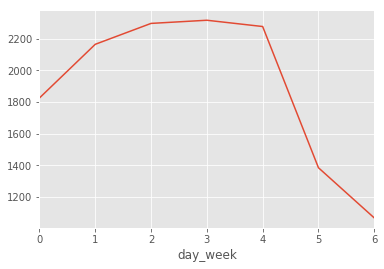

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

ridership_by_day.plot()

In [86]:
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

### 每小时入站和出战数

In [87]:
def hourly_for_group(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

In [88]:
# ridership_df.groupby('UNIT').apply(hourly_for_group) # 报错
ridership_df.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(hourly_for_group)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


### 合并DataFrame

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [91]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

subway_df.head(3)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564


In [92]:
weather_df.head(3)

,DATEn,fog,hour,latitude,longitude,pressurei,rain,tempi,wspdi
0,05-01-11,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
1,05-01-11,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
2,05-02-11,0,0,40.689945,-73.872564,30.32,0,48.9,6.9


In [93]:
subway_df.merge(weather_df,
               on = ['DATEn', 'hour', 'latitude', 'longitude'],
               how = 'inner')

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0
